#### Importing Libraries

In [194]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


### Data Collection

In [195]:
df = pd.read_csv(r'D:\Deep Learning\Artificial_Neuron_Network (ANN)\Binary-class\Chrun-Pred\Churn_Modelling.csv')

In [196]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
df.shape

(10000, 14)

In [198]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [200]:
df.duplicated().sum()

np.int64(0)

In [201]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [202]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [203]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [204]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [205]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [206]:
df['Geography'] = df['Geography'].map({'France':0, 'Spain':1, 'Germany':2})
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [207]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [209]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [210]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,2,0,42,3,75075.31,2,1,0,92888.52


In [211]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [212]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [213]:
X_train.shape

(8000, 10)

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [215]:
X_train_scaled

array([[ 0.35649971, -0.90598864, -0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  0.29858326, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.90598864,  1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.90598864, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]], shape=(8000, 10))

In [216]:
X_test_scaled

array([[-0.57749609,  1.50315516, -0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.90598864, -0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  0.29858326,  1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.90598864,  1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.90598864, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]], shape=(2000, 10))

In [217]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=10))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [218]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231 (924.00 B)

 Trainable params: 231 (924.00 B)

 Non-trainable params: 0 (0.00 B)

In [219]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [220]:
his = model.fit(X_train_scaled,y_train,epochs=15,validation_split=0.2)

Epoch 1/15


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6811 - loss: 0.6159 - val_accuracy: 0.7987 - val_loss: 0.5033
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.4765 - val_accuracy: 0.8019 - val_loss: 0.4386
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8034 - loss: 0.4388 - val_accuracy: 0.8169 - val_loss: 0.4152
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8153 - loss: 0.4211 - val_accuracy: 0.8306 - val_loss: 0.4026
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4065 - val_accuracy: 0.8369 - val_loss: 0.3928
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.3920 - val_accuracy: 0.8419 - val_loss: 0.3832
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8413 - loss: 0.3789 - val_accuracy: 0.8475 - val_loss: 0.3748
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.3695 - val_accuracy: 0.8462 - val_

In [221]:
model.layers[0].get_weights()

[array([[-0.14118674,  0.2814995 ,  0.14285292, -0.27938718, -0.00742921,
          0.10740851, -0.11089195, -0.13484995,  0.26565096, -0.08347423],
        [-0.5058943 , -0.34899747, -0.07781022,  0.38795567, -0.34695238,
         -0.1940882 ,  0.0725579 ,  0.01445171,  0.25511062, -0.0292388 ],
        [ 0.23071316, -0.0414662 ,  0.06518929, -0.048783  , -0.29137143,
         -0.7581397 , -0.18456692,  0.10714529,  0.28771186,  0.0504464 ],
        [-0.152439  ,  0.7181387 ,  0.27711278,  0.10661747,  0.11334001,
         -0.00879222, -0.26028845, -0.7018601 , -0.34208256,  0.16697453],
        [-0.11418185, -0.10631429,  0.08516   , -0.17693624,  0.27210298,
          0.25301674, -0.2727999 , -0.06087916, -0.07859965, -0.05396636],
        [ 0.36804557,  0.17450847, -0.17842098, -0.2950981 , -0.19399723,
         -0.23645818,  0.09577242, -0.2102755 ,  0.0382709 ,  0.16847818],
        [ 0.64041835, -0.26300862, -1.034448  , -1.057897  , -0.274038  ,
          0.05063543,  0.0029067

In [222]:
model.layers[1].get_weights()

[array([[ 0.47857094,  0.29393154,  0.1969335 ,  0.5067012 , -0.2962864 ,
          0.22918011,  0.11107263,  0.0050435 ,  0.033062  , -0.26580033],
        [-0.42251936, -0.14142527, -0.43262514,  0.25814274, -0.46078357,
         -0.06631912, -0.21193942,  0.2351834 ,  0.31335765, -0.5656825 ],
        [ 0.5881401 ,  0.7179197 , -0.10510875, -0.22050138,  0.35724267,
         -0.4824652 ,  0.5617876 , -0.5142299 , -0.50699764,  0.30874535],
        [-0.55122924,  0.66495574, -0.40892008, -0.01454989,  0.3571594 ,
         -0.05642596, -0.05737796, -0.2438614 , -0.3104018 , -0.4865656 ],
        [ 0.43616906, -0.13758297,  0.25669667,  0.69153476,  0.3203944 ,
         -0.2590984 ,  0.11148081,  0.6582773 ,  0.6272937 ,  0.08456943],
        [-0.17911956,  0.37683874,  0.16919301, -0.25598702,  0.33875522,
          0.56240714,  0.23889051,  0.19340591,  0.02345207,  0.3268297 ],
        [-0.19827975, -0.21789895,  0.02238136, -0.27173996, -0.08473238,
         -0.16444913,  0.2749498

In [223]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [224]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [225]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print('Accuracy:', acc)

Accuracy: 0.853


In [226]:
his.history

{'accuracy': [0.6810937523841858,
  0.7932812571525574,
  0.8034374713897705,
  0.8153125047683716,
  0.8253124952316284,
  0.8339062333106995,
  0.8412500023841858,
  0.8478124737739563,
  0.8503124713897705,
  0.8534374833106995,
  0.854687511920929,
  0.8571875095367432,
  0.8576562404632568,
  0.8579687476158142,
  0.8603125214576721],
 'loss': [0.615871787071228,
  0.4765264093875885,
  0.43883365392684937,
  0.4211348593235016,
  0.4065251052379608,
  0.39196231961250305,
  0.37894925475120544,
  0.3694722354412079,
  0.3624342083930969,
  0.3568252623081207,
  0.3533691167831421,
  0.35019248723983765,
  0.34854409098625183,
  0.3466428518295288,
  0.34575989842414856],
 'val_accuracy': [0.7987499833106995,
  0.8018749952316284,
  0.8168749809265137,
  0.8306249976158142,
  0.8368750214576721,
  0.8418750166893005,
  0.8475000262260437,
  0.8462499976158142,
  0.8481249809265137,
  0.8512499928474426,
  0.8487499952316284,
  0.8525000214576721,
  0.8550000190734863,
  0.85437500

not much overfitting

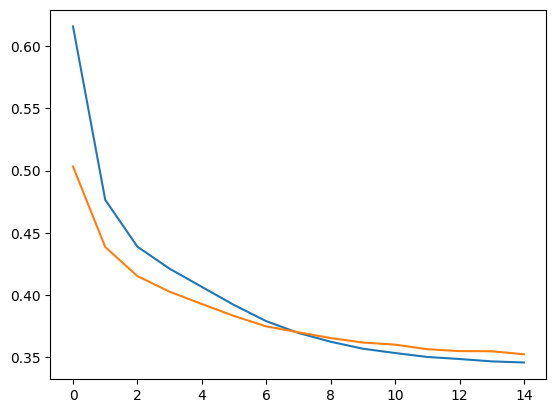

In [227]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

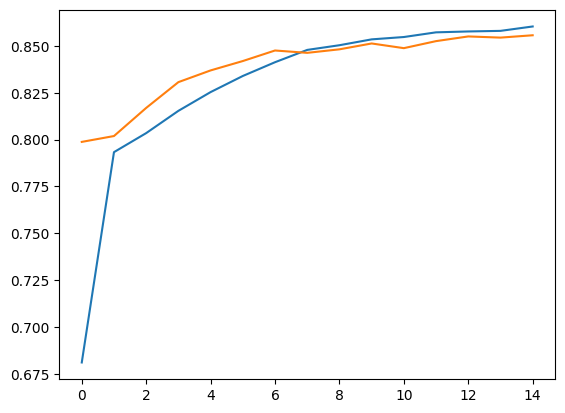

In [230]:
plt.plot(his.history['accuracy'], label='train_accuracy')
plt.plot(his.history['val_accuracy'], label='train_accuracy')